In [1]:
import matplotlib.pyplot as plt
import numpy as np
from utils import *

In [ ]:
! wget https://s3.amazonaws.com/drivendata-prod/data/44/public/dengue_features_train.csv -P ./data/sub
! wget https://s3.amazonaws.com/drivendata-prod/data/44/public/dengue_labels_train.csv -P ./data/sub
! wget https://s3.amazonaws.com/drivendata-prod/data/44/public/dengue_features_test.csv -P ./data/sub

In [3]:
train_df, test_df = load_data()

shape train feature: (1456, 24)
shape train labels: (1456, 4)
shape test feature: (416, 24)
shape train merge: (1456, 25)


## Checking how KNN and IterativeImputer performs for imputing missing data

In [4]:
from sklearn.experimental import enable_iterative_imputer
rom sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

d_cols = ['city', 'year', 'weekofyear', 'week_start_date']
train_to_impute = train_df.drop(columns=d_cols)
iimputer = IterativeImputer(max_iter=100, random_state=0)
knnimputer = KNNImputer(add_indicator=True)
train_imp = iimputer.fit_transform(train_to_impute)
train_imp_knn = knnimputer.fit_transform(train_to_impute)
missings = train_imp_knn[:, 21:].astype(bool)
train_imp_knn = train_imp_knn[:,:21]

NameError: name 'train_imp_knn' is not defined

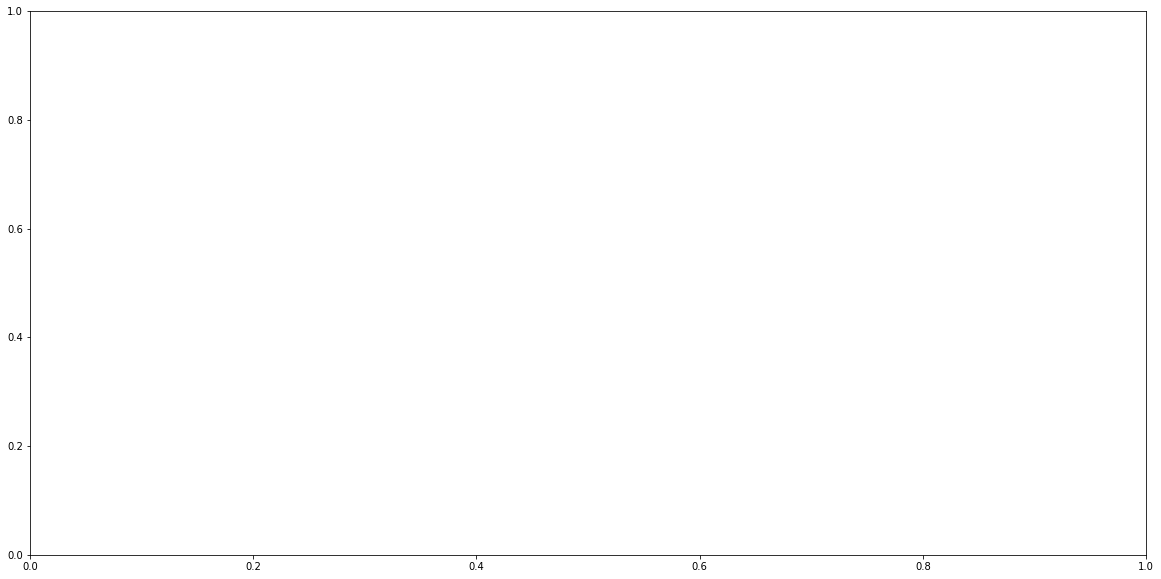

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(train_imp_knn[missings[:,0], 0], label='knn')
ax.plot(train_imp[missings[:,0], 0], label='iter')
ax.plot(train_imp[missings[:,0], 1], label='nnan')

plt.legend()


IterativeImputer seems more in line with other features    

## Format the data specifically for AWS SageMaker DeepAR model

In [5]:
features = [0, 4, 5, 6, 7] # keeping only the NDVI

In [13]:
from sklearn.experimental import enable_iterative_imputer
rom sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

def impute_nan(train_data, imputer=None):  
    if imputer==None:
        imputer = IterativeImputer(max_iter=100, random_state=0)
    train_imp = imputer.fit_transform(train_to_impute)
    features = train_imp
    return features, imputer

def create_json_obj(city, start_date, labels, features):
    dic_ts = {
        'start': str(start_date),
        'target': timeserie[:, 0].tolist(),
        'cat': [CITIES_DICT[city]],
        'dynamic_feat': timeserie[:,1:].T.tolist()
    }
    
    json_ts = json.dumps(dic_ts)
    return json_ts

d_cols = ['city', 'year', 'weekofyear', 'week_start_date', 'total_cases']
json_data = []
for city in CITIES_DICT:
    data = train_df[train_df.city==city].drop(columns=d_cols)
    labels = train_df.loc[train_df.city==city, 'total_cases']
    train_imp = impute_nan(data)
    json_data.append( create_json_obj(city, 
                                      data.week_start_date.iloc[0], 
                                      label, 
                                      train_imp) )


NameError: name 'IterativeImputer' is not defined

In [9]:
write_json(train_data, '_train.json')

Wrote 59104 chars to ./data/train.json
Wrote 33828 chars to ./data/train.json
./data/train.json saved


In [ ]:
# we need to insert target and features of `context` length
test_data = { city: [
                test_df[test_df.city==city].week_start_date.iloc[0], # we need the start date for training
                test_imp[test_df.city==city][:, features] 
                ] for city in CITIES_DICT }

In [9]:
test = {}

json.dump(test)

TypeError: dump() missing 1 required positional argument: 'fp'